In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [5]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 1, 0.9999999999, y_pred)
    y_pred = np.where(y_pred == 0, 0.0000000001, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [7]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

0.052680257878913145

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [6]:
# Функция сигмоиды позволяет перевести ответы обычной линейной функции, которые распределены от -∞ до +∞ в интервал [0, 1].
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [9]:
# функция, обучающая логистическую регрессию
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, err

In [10]:
W, err = eval_model(X_st, y, iterations=100000, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
10000 [ 0.30085159 -0.70010366  0.66304526  1.28880867] 0.5201502810376881
20000 [ 0.21871381 -0.71695701  0.72733591  1.28031405] 0.5084284623865897
30000 [ 0.15158336 -0.7159557   0.78086078  1.2899477 ] 0.5009374213805786
40000 [ 0.09284027 -0.71710202  0.82366919  1.30615742] 0.4953749740011232
50000 [ 0.04045392 -0.7205475   0.85790287  1.32689855] 0.49100762530714015
60000 [-0.00702645 -0.7256221   0.88536634  1.35090215] 0.4873917229674506
70000 [-0.05072838 -0.7317913   0.90747125  1.37718904] 0.48426099191072886
80000 [-0.09152177 -0.73866018  0.92530946  1.40500779] 0.48145570893707534
90000 [-0.13007207 -0.74594009  0.93972283  1.43379081] 0.4788792050452245


In [ ]:
from tqdm import tqdm
iterations_ = np.arange(100, 10000)
err_ = 10000
err_list = []
# for iterations_ in np.arange(100, 10000):
for iterations_ in tqdm(iterations_):
    for eta_ in np.arange(1e-4, 1e-3):
        W, err = eval_model(X_st, y, iterations=iterations_, eta=eta_)
        err_list.append(err)
        if err < err_:
            err_ = err
            iterations1 = iterations_
            eta1 = eta_
            W_ = W
print(f'W={W_}, err={err_}, iterations={iterations1}, eta={eta1}')

100%|██████████████████████████████████████████████████████████████████████████████| 9900/9900 [34:00<00:00,  2.47it/s]

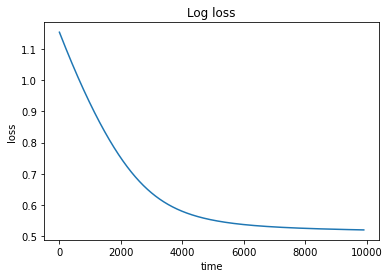

In [14]:
# как менялась при этом функция потерь
plt.title('Log loss')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(err_list);

Получается, что для минимизации log loss, аргументы функции eval_model для логистической регрессии должны быть: iterations=10000, eta=0.0001

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


Вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

In [11]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [12]:
calc_pred_proba(W, X_st)

array([0.4039261 , 0.50081597, 0.69233413, 0.03891744, 0.80706045,
       0.72169461, 0.81538552, 0.21404364, 0.38054588, 0.78609575])

In [13]:
y_pred_proba = calc_pred_proba(W, X)
y_pred_proba

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [14]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    return y_pred

In [15]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [16]:
y, y_pred

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1]))

In [18]:
# функция подсчёта ошибок
def accuracy(y, y_pred):
    count = 0
    for pos, i in enumerate(y):
        if y_pred[pos] == i:
            count += 1
    acc = count / len(y)
    return acc

In [19]:
accuracy(y, y_pred)

0.7

In [23]:
# функция построения матрицы ошибок
def err_matrix(y, y_pred):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for pos, i in enumerate(y):
        if y_pred[pos] == 1 and i == 1:
            TP += 1
        elif y_pred[pos] == 1 and i == 0:
            FP += 1
        elif y_pred[pos] == 0 and i == 1:
            FN += 1
        elif y_pred[pos] == 0 and i == 0:
            TN += 1
        else:
            print('Error')
    df = pd.DataFrame({' ':['𝑎(𝑥) = +1','𝑎(𝑥) = -1'], 'y = +1':[f'TP = {TP}', f'FN = {FN}'], 'y = -1':[f'FP = {FP}', f'TN = {TN}']})
    #print(TP, FP, FN, TN)
    return df.style.hide_index()

In [24]:
err_matrix(y, y_pred)

,y = +1,y = -1
𝑎(𝑥) = +1,TP = 4,FP = 2
𝑎(𝑥) = -1,FN = 1,TN = 3


In [30]:
# Функция точност (precision)
def precision(y, y_pred):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for pos, i in enumerate(y):
        if y_pred[pos] == 1 and i == 1:
            TP += 1
        elif y_pred[pos] == 1 and i == 0:
            FP += 1
        elif y_pred[pos] == 0 and i == 1:
            FN += 1
        elif y_pred[pos] == 0 and i == 0:
            TN += 1
        else:
            print('Error')
    return TP / (TP + FP)

In [31]:
precision(y, y_pred)

0.6666666666666666

In [32]:
# Функция полноты (recall)
def recall(y, y_pred):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for pos, i in enumerate(y):
        if y_pred[pos] == 1 and i == 1:
            TP += 1
        elif y_pred[pos] == 1 and i == 0:
            FP += 1
        elif y_pred[pos] == 0 and i == 1:
            FN += 1
        elif y_pred[pos] == 0 and i == 0:
            TN += 1
        else:
            print('Error')
    return TP / (TP + FN)

In [33]:
recall(y, y_pred)

0.8

Существует также усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$). Его изменение требуется, когда необходимо отдать приоритет точности или полноте, как это было показано в примерах ранее. Чтобы важнее была полнота, $\beta$ должно быть меньше 1, чтобы важнее была точность - больше.

In [48]:
# Функция F-меры
def f_score(y, y_pred, beta):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for pos, i in enumerate(y):
        if y_pred[pos] == 1 and i == 1:
            TP += 1
        elif y_pred[pos] == 1 and i == 0:
            FP += 1
        elif y_pred[pos] == 0 and i == 1:
            FN += 1
        elif y_pred[pos] == 0 and i == 0:
            TN += 1
        else:
            print('Error')
    return (1 + beta ** 2) * TP ** 2 / ((TP + FP) * (TP + FN)) / (beta ** 2 * TP/(TP + FN) + TP / (TP + FN))

In [49]:
f_score(y, y_pred, 1)

0.6666666666666666

Проверка метрик

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [52]:
accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred)

(0.7, 0.6666666666666666, 0.8, 0.7272727272727272)

In [53]:
confusion_matrix(y, y_pred)

array([[3, 2],
       [1, 4]], dtype=int64)

6. Могла ли модель переобучиться? Почему?

Да, модель могла переобучиться при большом количестве итераций.